<h2 style='text-align: right;'> FIT1043 Introduction To Data Science </h2>
<h3 style='text-align: right;'> Assignment 2 </h3>
<p style='text-align: right;'> Lee Hao Yang<br>34393862 </p>


<a id="0"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#294B8E;
            overflow:hidden;
            font-weight:700"><span style='color:#CDA63A'>|</span> Table Of Contents</div>

<a id="toc"></a>
- [A. Classification](#1)
    - [A1. Supervised Learning](#1.1)
        - [Supervised machine learning](#1.1.1)
        - [Labelled data](#1.1.2)
        - [Train and test datasets](#1.1.3)
        - [Features selection](#1.1.4)
    - [A2. Classification (training)](#1.2)
        - [Binary & Multi-class classification](#1.2.1)
        - [Scaling the data](#1.2.2)
        - [Support Vector Machine (SVM)](#1.2.3)
        - [Kernel in SVM](#1.2.4)
        - [Building a SVM model](#1.2.5)
        - [XGBClassifier as comparison model](#1.2.6)
    - [A3. Classification (prediction)](#1.3)
        - [Test set prediction](#1.3.1)
        - [Performance comparison](#1.3.2)
    - [A4. Independent Evaluation](#1.4)
        - [Predicting with new dataset](#1.4.1)
- [B. Selection of Dataset, Clustering and Video Preparation](#2)
    - [B1. Selection of a dataset with missing data and clustering](#2.1)
        - [Read the dataset](#2.1.1)
        - [Dataset Analysis](#2.1.2)
        - [Handling null values](#2.1.3)
        - [K-means clustering](#2.1.4)
        - [In-depth analysis](#2.1.5)

<a id="1"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#294B8E;
            overflow:hidden;
            font-weight:700">A <span style='color:#CDA63A'>|</span> Classification</div>

<a id="1.1"></a>
### <b>A1. <span style='color:#E1B12D'>Supervised Learning</span></b>

<a id="1.1.1"></a>
#### <b><span style='color:#87CEEB'>What is supervised machine learning?</span></b>

Supervised machine learning is a type of machine learning where the model learns from labelled data to make predictions or decisions. In supervised learning, the algorithm is trained on a dataset where the desired output (label or target variable) is already known for each input example. The goal is to learn a function that maps the input features to the corresponding output labels, allowing the model to make accurate predictions on new, unseen data.

<a id="1.1.2"></a>
#### <b><span style='color:#87CEEB'>What is labelled data?</span></b>

Labelled data refers to a dataset where each example or instance is associated with a specific label or target value. The label represents the desired output or the correct answer for that particular input. For example, in a binary classification problem of determining whether an email is spam or not, the labelled data would consist of a collection of emails, where each email is labelled as either "spam" or "not spam". The labels provide the ground truth that the model aims to learn from during the training process.

<a id="1.1.3"></a>
#### <b><span style='color:#87CEEB'>What is train and test datasets?</span></b>

The train dataset is used to train the machine learning model and typically consists of a large portion of the labelled data, usually around 70-80% of the total data. During training, the model learns from the input features and their corresponding labels in the train dataset. It adjusts its internal parameters to minimize the difference between its predictions and the actual labels, with the goal of capturing the underlying patterns and relationships in the data.

On the other hand, the test dataset is used to evaluate the performance of the trained model and consists of the remaining portion of the labelled data, usually around 20-30% of the total data. The test dataset is not used during the training process and serves as an independent set for assessing the model's performance. After training, the model is applied to the test dataset, and its predictions are compared against the actual labels. Metrics such as accuracy, precision, recall, or F1 score are calculated to measure how well the model generalizes to unseen data.

<a id="1.1.4"></a>
#### <b><span style='color:#87CEEB'>Feature selection and training & test data split</span></b>

##### Step 1. <span style="color:orange">Import necessary libraries</span>

In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

##### Step 2. <span style="color:orange">Import Data</span>

In [2]:
# read file into a pandas dataframe
df = pd.read_csv("FIT1043-MusicGenre-Dataset.csv")

##### Step 3. <span style="color:orange">Data Exploration</span>

In [3]:
df

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,music_genre
0,77382,Sheena Ringo,獣ゆく細道,48,0.01340,0.423,224053,0.799,0.000004,0.1470,-4.227,0.0447,124.626,0.5560,1
1,23554,empty_field,Fossil Roo,22,0.86200,0.590,151067,0.221,0.468000,0.0736,-16.338,0.0383,129.984,0.0331,1
2,82886,The Beatles,Dear Prudence - 2018 Mix,62,0.09040,0.395,234973,0.538,0.000453,0.0685,-10.300,0.0456,150.785,0.3690,9
3,37772,Pink Floyd,Have a Cigar,64,0.40700,0.454,307733,0.650,0.049800,0.5890,-10.191,0.0437,120.154,0.7200,9
4,80191,A-Trak,Push,43,0.00145,0.642,213512,0.877,0.002790,0.0984,-2.878,0.0450,126.058,0.4960,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25953,70328,Tosca,Swimswimswim,57,0.01400,0.903,252245,0.545,0.004920,0.2240,-7.761,0.0380,120.017,0.9560,5
25954,65621,Wolfgang Amadeus Mozart,"Requiem in D Minor, K. 626: II. Kyrie eleison ...",13,0.99300,0.275,179240,0.409,0.825000,0.2150,-16.666,0.0322,77.858,0.2250,3
25955,82975,Elmore James,Dust My Broom,43,0.01150,0.507,175040,0.660,0.336000,0.3220,-4.957,0.0306,100.783,0.6960,2
25956,36145,Wiz Khalifa,True Colors (feat. Nicki Minaj),50,0.00451,0.805,255147,0.744,0.000000,0.3500,-6.020,0.0572,124.983,0.5190,6


In [4]:
# get rid of instance id and track name
df = df.drop(['instance_id', 'track_name'], axis=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25958 entries, 0 to 25957
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist_name       25958 non-null  object 
 1   popularity        25958 non-null  int64  
 2   acousticness      25958 non-null  float64
 3   danceability      25958 non-null  float64
 4   duration_ms       25958 non-null  int64  
 5   energy            25958 non-null  float64
 6   instrumentalness  25958 non-null  float64
 7   liveness          25958 non-null  float64
 8   loudness          25958 non-null  float64
 9   speechiness       25958 non-null  float64
 10  tempo             25958 non-null  float64
 11  valence           25958 non-null  float64
 12  music_genre       25958 non-null  int64  
dtypes: float64(9), int64(3), object(1)
memory usage: 2.6+ MB


In [6]:
df.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,music_genre
count,25958.000000,25958.000000,25958.000000,2.595800e+04,25958.000000,25958.000000,25958.000000,25958.000000,25958.000000,25958.000000,25958.000000,25958.000000
mean,44.168541,0.307858,0.557978,2.454655e+05,0.599596,0.182954,0.193972,-9.167320,0.094058,120.003122,0.458558,4.480083
std,15.547882,0.342093,0.178840,1.105926e+05,0.265468,0.326709,0.162042,6.180744,0.102968,30.612044,0.247895,2.870148
min,0.000000,0.000000,0.059600,1.631600e+04,0.000792,0.000000,0.009670,-47.046000,0.022300,34.347000,0.000000,0.000000
25%,34.000000,0.020300,0.442000,1.904285e+05,0.430000,0.000000,0.096900,-10.898000,0.035900,94.986000,0.260000,2.000000
50%,45.000000,0.146000,0.569000,2.275015e+05,0.645000,0.000167,0.126000,-7.293000,0.048700,119.848500,0.451000,4.000000
75%,55.000000,0.553000,0.686000,2.758930e+05,0.817000,0.158000,0.243000,-5.185000,0.098575,140.493750,0.650000,7.000000
max,99.000000,0.996000,0.986000,4.497994e+06,0.999000,0.996000,1.000000,3.744000,0.942000,220.276000,0.989000,9.000000


In [7]:
# make all values of loudness positive by shifting it by 60 dB
df["loudness"] = df["loudness"] + 60

##### Step 4. <span style="color:orange">Feature Selection</span>

In [8]:
# select numeric features for correlation analysis
numeric_features = df.select_dtypes(include=[np.number])

# do not include music genre in the correlation analysis
numeric_features = numeric_features.drop(['music_genre'], axis=1)

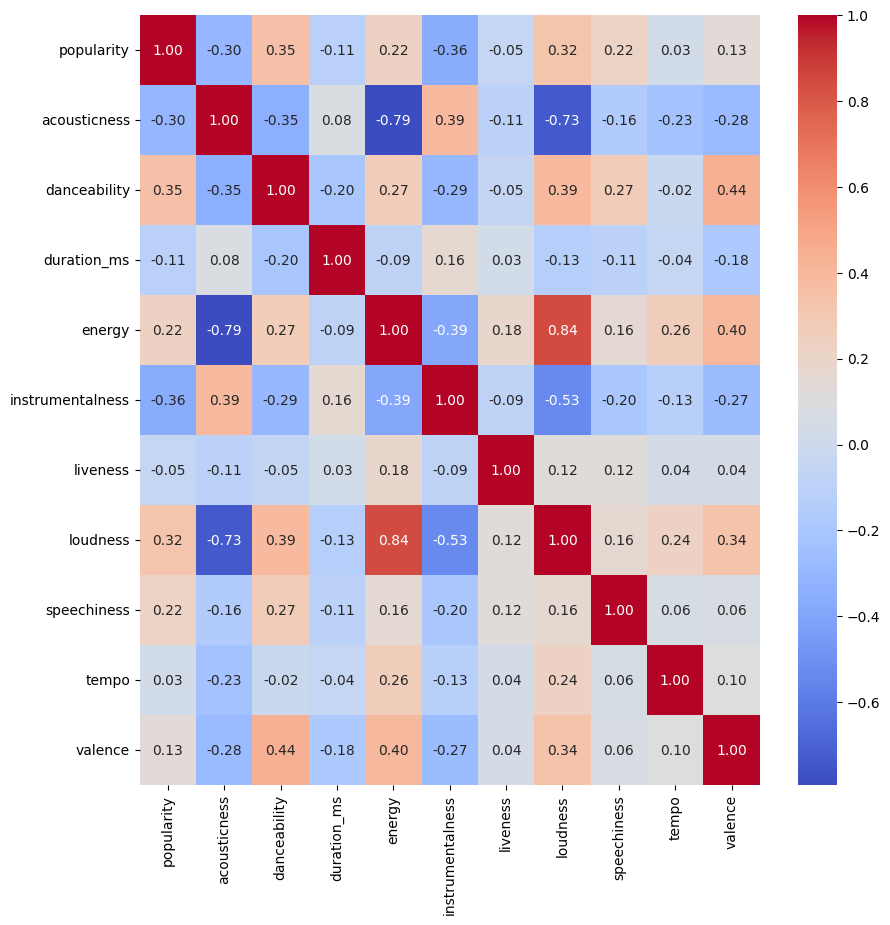

In [9]:
# correlation matrix of relevant numerical features
corr = df[numeric_features.columns].corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [10]:
# chi squared test for feature selection
from sklearn.feature_selection import SelectKBest, chi2

# apply SelectKBest class to rank all features
bestfeatures = SelectKBest(score_func=chi2, k=11)
fit = bestfeatures.fit(df[numeric_features.columns], df['music_genre'])
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(df[numeric_features.columns].columns)

# concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Specs', 'Score']
print(featureScores.nlargest(11, 'Score'))

               Specs         Score
3        duration_ms  8.006436e+07
0         popularity  8.777194e+04
7           loudness  9.895292e+03
9              tempo  9.072434e+03
5   instrumentalness  5.293920e+03
1       acousticness  3.886633e+03
4             energy  1.070088e+03
8        speechiness  8.250021e+02
2       danceability  5.561835e+02
10           valence  5.400037e+02
6           liveness  4.453720e+01


We will remove 'liveness' as it has the lowest score from the chi square test. Then, we will remove 'energy' because it has a strong positive correlation with loudness while scoring lower in the chi square test.

In [11]:
# get rid of liveness because it is not one of the top 10 features
df = df.drop('liveness', axis=1)

# get rid of energy because it is highly correlated to loudness
df = df.drop('energy', axis=1)

df

,artist_name,popularity,acousticness,danceability,duration_ms,instrumentalness,loudness,speechiness,tempo,valence,music_genre
0,Sheena Ringo,48,0.01340,0.423,224053,0.000004,55.773,0.0447,124.626,0.5560,1
1,empty_field,22,0.86200,0.590,151067,0.468000,43.662,0.0383,129.984,0.0331,1
2,The Beatles,62,0.09040,0.395,234973,0.000453,49.700,0.0456,150.785,0.3690,9
3,Pink Floyd,64,0.40700,0.454,307733,0.049800,49.809,0.0437,120.154,0.7200,9
4,A-Trak,43,0.00145,0.642,213512,0.002790,57.122,0.0450,126.058,0.4960,5
...,...,...,...,...,...,...,...,...,...,...,...
25953,Tosca,57,0.01400,0.903,252245,0.004920,52.239,0.0380,120.017,0.9560,5
25954,Wolfgang Amadeus Mozart,13,0.99300,0.275,179240,0.825000,43.334,0.0322,77.858,0.2250,3
25955,Elmore James,43,0.01150,0.507,175040,0.336000,55.043,0.0306,100.783,0.6960,2
25956,Wiz Khalifa,50,0.00451,0.805,255147,0.000000,53.980,0.0572,124.983,0.5190,6


##### Step 5. <span style="color:orange">Train test dataset split</span>

In [12]:
# split training and testing data
from sklearn.model_selection import train_test_split
X = df.drop(['music_genre'], axis=1)
y = df['music_genre']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train

,artist_name,popularity,acousticness,danceability,duration_ms,instrumentalness,loudness,speechiness,tempo,valence
2878,Aminé,74,0.39100,0.693,173947,0.000000,52.088,0.2240,78.100,0.868
5140,Ayumi Hamasaki,33,0.29100,0.492,329567,0.000000,50.472,0.0267,143.939,0.213
8944,Token,53,0.22400,0.547,276016,0.000001,52.795,0.3790,78.978,0.163
1272,LCD Soundsystem,57,0.14800,0.701,462267,0.625000,54.389,0.0425,142.584,0.795
20100,Ronnie Dunn,38,0.16900,0.587,223533,0.000000,54.312,0.0365,106.007,0.411
...,...,...,...,...,...,...,...,...,...,...
21575,Lemongrass,44,0.27100,0.705,242844,0.452000,49.428,0.0376,92.005,0.605
5390,Nobuo Uematsu,31,0.85000,0.319,190133,0.338000,48.452,0.0317,169.998,0.322
860,Superfly,21,0.00768,0.381,260667,0.000015,58.236,0.0616,141.949,0.245
15795,Guillaume Dufay,33,0.99300,0.189,288947,0.001110,39.992,0.0424,84.969,0.130


<a id="1.2"></a>
### <b>A2. <span style='color:#E1B12D'>Classification (training)</span></b>

<a id="1.2.1"></a>
#### <b><span style='color:#87CEEB'>What is the difference between binary and multi-class classification</span></b>

Binary classification is a type of classification problem in machine learning where the task is to classify instances into one of two mutually exclusive classes or categories. The model predicts a binary outcome, typically represented as 0 or 1, yes or no, true or false, or any other pair of distinct labels. Examples of binary classification problems include spam email detection (spam or not spam), medical diagnosis (positive or negative for a specific condition), and sentiment analysis (positive or negative sentiment). In binary classification, the model learns a decision boundary that separates the two classes based on the input features, with the goal of accurately predicting the correct class for new, unseen instances.

On the other hand, multi-class classification involves classifying instances into one of three or more classes or categories. The model predicts a single class label from a set of multiple possible classes. Examples of multi-class classification problems include handwritten digit recognition (classifying digits 0-9), image classification (categorizing images into multiple object classes), and text categorization (assigning documents to multiple predefined categories). In multi-class classification, the model learns to distinguish between multiple classes based on the input features. The decision boundaries become more complex compared to binary classification, as the model needs to consider multiple class boundaries simultaneously.

<a id="1.2.2"></a>
#### <b><span style='color:#87CEEB'>Scaling the data & feature engineering</span></b>

The main reason for scaling is to ensure that all features contribute equally to the model's learning process. When features have different scales or ranges, some features may dominate others and bias the model's performance. For example, if one feature has values ranging from 0 to 1, while another feature has values ranging from 1000 to 10000, the model may give more importance to the feature with larger values, even if it is not necessarily more informative. This can lead to suboptimal performance and inaccurate predictions. For example, classification models like SVM are particularly sensitive to unscaled features because they rely on the concept of distance between data points. If features have different scales, the distances between data points become distorted, and the model may struggle to find an optimal decision boundary. By scaling the features to a common range, such as between 0 and 1 or with a mean of 0 and a standard deviation of 1, the model can treat all features equally and focus on the underlying patterns and relationships in the data, leading to improved classification accuracy.

In [13]:
# analyze artist name
df['artist_name'].value_counts()

artist_name
empty_field                1273
Nobuo Uematsu               238
Wolfgang Amadeus Mozart     224
Johann Sebastian Bach       178
Ludwig van Beethoven        164
                           ... 
Gavin Bryars                  1
Dharius                       1
The Lovin' Spoonful           1
Neal Schon                    1
KuroUsa                       1
Name: count, Length: 5367, dtype: int64

In [14]:
# split into categorical and numerical columns in train set
X_train_cat = X_train.select_dtypes(include=['object'])
X_train_num = X_train.select_dtypes(include=['int64', 'float64'])

# split into categorical and numerical columns in test set
X_test_cat = X_test.select_dtypes(include=['object'])
X_test_num = X_test.select_dtypes(include=['int64', 'float64'])

We will replace empty_field with a random string so that our model won't associate it with anything after encoding and vectorization

In [15]:
import random
import string

# empty_field is the NaN value in artist_name, replace it with a random unique string to not create biases in the model
def generate_random_string():
    return ''.join(random.choices(string.ascii_uppercase + string.digits, k=10))

# For X_train_cat
X_train_cat.loc[X_train_cat['artist_name'] == 'empty_field', 'artist_name'] = X_train_cat.loc[X_train_cat['artist_name'] == 'empty_field', 'artist_name'].apply(lambda x: generate_random_string())

# For X_test_cat
X_test_cat.loc[X_test_cat['artist_name'] == 'empty_field', 'artist_name'] = X_test_cat.loc[X_test_cat['artist_name'] == 'empty_field', 'artist_name'].apply(lambda x: generate_random_string())

# check
display(X_train_cat['artist_name'].value_counts())
display(X_test_cat['artist_name'].value_counts())

artist_name
Nobuo Uematsu              195
Wolfgang Amadeus Mozart    178
Johann Sebastian Bach      152
Ludwig van Beethoven       126
Frédéric Chopin            108
                          ... 
Uncle Tupelo                 1
EZKFKZC578                   1
Pieces Of A Dream            1
Kid Frost                    1
William Bolcom               1
Name: count, Length: 5933, dtype: int64

artist_name
Wolfgang Amadeus Mozart    46
Nobuo Uematsu              43
Ludwig van Beethoven       38
Johann Sebastian Bach      26
Frédéric Chopin            24
                           ..
Mees Dierdorp               1
sober rob                   1
Jez Dior                    1
Chris Lake                  1
Maretu                      1
Name: count, Length: 2660, dtype: int64

Artist name contains information, it will be encoded and also represented as word embeddings.

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
from gensim.models import Word2Vec

def embed_columns(df, columns, vector_size=50, window=5, min_count=1, workers=4, vocab=None):

    for column in columns:

        # Create a CountVectorizer with the common words as the vocabulary
        vectorizer = CountVectorizer(vocabulary=vocab)
        X_counts = vectorizer.fit_transform(df[column])
        tokenizer = vectorizer.build_tokenizer()
        tokenized = [tokenizer(text) for text in df[column]]

        # Train a Word2Vec model
        word2vec = Word2Vec(sentences=tokenized, vector_size=vector_size, window=window, min_count=min_count, workers=workers)

        # Compute the average Word2Vec vector for each text
        vectors = []
        for text in tokenized:
            text_vectors = [word2vec.wv[word] for word in text if word in word2vec.wv.key_to_index]
            if text_vectors:
                mean_vector = np.mean(text_vectors, axis=0)
            else:
                mean_vector = np.zeros(word2vec.vector_size)
            vectors.append(mean_vector)

        # Convert list of vectors into DataFrame
        vectors_df = pd.DataFrame(vectors)

        # Add unique prefixes to the column names
        vectors_df.columns = [f'{column}_vector_' + str(i) for i in vectors_df.columns]

        # Reset index before concatenating
        df.reset_index(drop=True, inplace=True)
        vectors_df.reset_index(drop=True, inplace=True)

        # Concatenate the original DataFrame (without the current column) and the new DataFrame of vectors
        df = pd.concat([df, vectors_df], axis=1)

    return df

Vectorization and target encoding on artist name

In [17]:
from sklearn.preprocessing import TargetEncoder

# embed the artist name column
X_train_cat = embed_columns(X_train_cat, X_train_cat.columns)
X_test_cat = embed_columns(X_test_cat, X_test_cat.columns)

# target encode the remaining categorical columns
enc = TargetEncoder()
X_train_cat_encoded = enc.fit_transform(X_train_cat[['artist_name']], y_train)
X_train_cat_encoded = pd.DataFrame(X_train_cat_encoded, columns=[f"encoded_artist_name_{i}" for i in range(X_train_cat_encoded.shape[1])])

X_test_cat_encoded = enc.transform(X_test_cat[['artist_name']])
X_test_cat_encoded = pd.DataFrame(X_test_cat_encoded, columns=[f"encoded_artist_name_{i}" for i in range(X_test_cat_encoded.shape[1])])

X_train_cat.drop(columns=['artist_name'], inplace=True)
X_train_cat = pd.concat([X_train_cat, X_train_cat_encoded], axis=1)

X_test_cat.drop(columns=['artist_name'], inplace=True)
X_test_cat = pd.concat([X_test_cat, X_test_cat_encoded], axis=1)

Scaling of numeric features with QuantileTransformer

In [18]:
# scale numerical columns
from sklearn.preprocessing import QuantileTransformer
scaler = QuantileTransformer()
X_train_num_transformed = scaler.fit_transform(X_train_num)
X_test_num_transformed = scaler.transform(X_test_num)

# change from np array to dataframe
X_train_num_transformed = pd.DataFrame(X_train_num_transformed, columns=[f"transform_{i}" for i in range(X_train_num_transformed.shape[1])])
X_test_num_transformed = pd.DataFrame(X_test_num_transformed, columns=[f"transform_{i}" for i in range(X_test_num_transformed.shape[1])])

Concatenating both dataframes back together

In [19]:
# add both dataframes together
X_train = pd.concat([X_train_cat, X_train_num_transformed], axis=1)
X_test = pd.concat([X_test_cat, X_test_num_transformed], axis=1)

# reset both indexes
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)

Make sure the dimensions match up for training and test dataset

In [20]:
# check dimensions
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(20766, 69)
(5192, 69)
(20766,)
(5192,)


<a id="1.2.3"></a>
#### <b><span style='color:#87CEEB'>What is a Support Vector Machine (SVM)?<span></b>

Support Vector Machines (SVM) is a supervised learning algorithm used for classification tasks. The goal of SVM is to find the optimal hyperplane that separates different classes of data points in a high-dimensional space. For example, given a dataset with two classes of data points represented by circles and squares in a 2D space, SVM aims to find the line that best separates these two classes by maximizing the margin, which is the distance between the line and the closest data points from each class, known as support vectors. The idea behind SVM is to find a hyperplane that not only separates the classes but also maximizes the margin, indicating a more robust and reliable separation. The hyperplane is defined by a set of weights and a bias term, which are learned during the training process by solving an optimization problem that seeks to maximize the margin while minimizing the classification error. Once the SVM model is trained, it can classify new, unseen data points by determining on which side of the hyperplane they fall and assigning the corresponding class label based on their position relative to the hyperplane.

<a id="1.2.4"></a>
#### <b><span style='color:#87CEEB'>What is a kernel in SVM?<span></b>

In many real-world scenarios, the data points in the original input space may not be linearly separable, making it challenging for Support Vector Machines (SVM) to find an optimal hyperplane that separates the classes. To overcome this limitation, SVM employs the concept of kernels. A kernel is a mathematical function that transforms the input data into a higher-dimensional feature space where the classes become linearly separable. By mapping the data points to this transformed space, SVM can handle complex patterns and capture non-linear relationships in the data without explicitly computing the coordinates in the higher-dimensional space. The kernel function measures the similarity between pairs of data points in the original input space and returns a scalar value representing their inner product in the transformed space. Various kernel functions are available, such as the linear kernel, polynomial kernel, and radial basis function (RBF) kernel, each with its own characteristics and suitability for different data distributions. During the training process, SVM utilizes the chosen kernel function to compute similarities between data points and learns the optimal hyperplane that maximizes the margin between classes while minimizing the classification error in the transformed space. The selection of an appropriate kernel function is crucial as it can significantly impact the performance of the SVM classifier, depending on the nature and complexity of the problem at hand.

<a id="1.2.5"></a>
#### <b><span style='color:#87CEEB'>Building a predictive SVM model using our training dataset<span></b>

Note: Hyperparameters of SVC had been fine tuned with Optuna

In [21]:
# import necessary libraries
from sklearn.svm import SVC

# create a support vector classifier
SVC = SVC(random_state = 13,
        C = 1.9579819308370698,
        gamma = 0.34530603308817975,
        coef0=0.9909739104925595)

# fit it with training data
SVC.fit(X_train, y_train)

SVC(C=1.9579819308370698, coef0=0.9909739104925595, gamma=0.34530603308817975,
    random_state=13)

<a id="1.2.5"></a>
#### <b><span style='color:#87CEEB'>Using XGBClassfier as a comparison model to SVC<span></b>

Note: Hyperparemeters of XGBClassifier had been fine tuned with Optuna

In [22]:
from xgboost import XGBClassifier

XGB = XGBClassifier(random_state = 13,
                    learning_rate = 0.01687984844120463,
                    n_estimators = 820,
                    max_depth = 5,
                    min_child_weight = 5,
                    subsample = 0.6497490531092324,
                    colsample_bytree = 0.6896568413138106,
                    gamma = 0.24316382755390453)

XGB.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6896568413138106, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.24316382755390453,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01687984844120463,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=820, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

<a id="1.3"></a>
### <b>A3. <span style='color:#E1B12D'>Classification (prediction)</span></b>

<a id="1.3.1"></a>
#### <b><span style='color:#87CEEB'>Prediction using SVC and XGBClassifier<span></b>

In [23]:
y_pred_SVC = SVC.predict(X_test)
y_pred_XGB = XGB.predict(X_test)

<a id="1.3.1"></a>
#### <b><span style='color:#87CEEB'>Performance comparison between SVC and XGBClassifier<span></b>

SVC accuracy: 0.802773497688752
XGB accuracy: 0.8023882896764253


SVC classification report:
              precision    recall  f1-score   support

           0       0.72      0.70      0.71       544
           1       0.96      0.96      0.96       477
           2       0.87      0.89      0.88       547
           3       0.96      0.96      0.96       495
           4       0.84      0.91      0.87       530
           5       0.92      0.93      0.93       530
           6       0.56      0.85      0.68       542
           7       0.83      0.85      0.84       485
           8       0.72      0.26      0.39       507
           9       0.75      0.72      0.73       535

    accuracy                           0.80      5192
   macro avg       0.81      0.80      0.79      5192
weighted avg       0.81      0.80      0.79      5192

XGB classification report:
              precision    recall  f1-score   support

           0       0.76      0.65      0.70       544
           

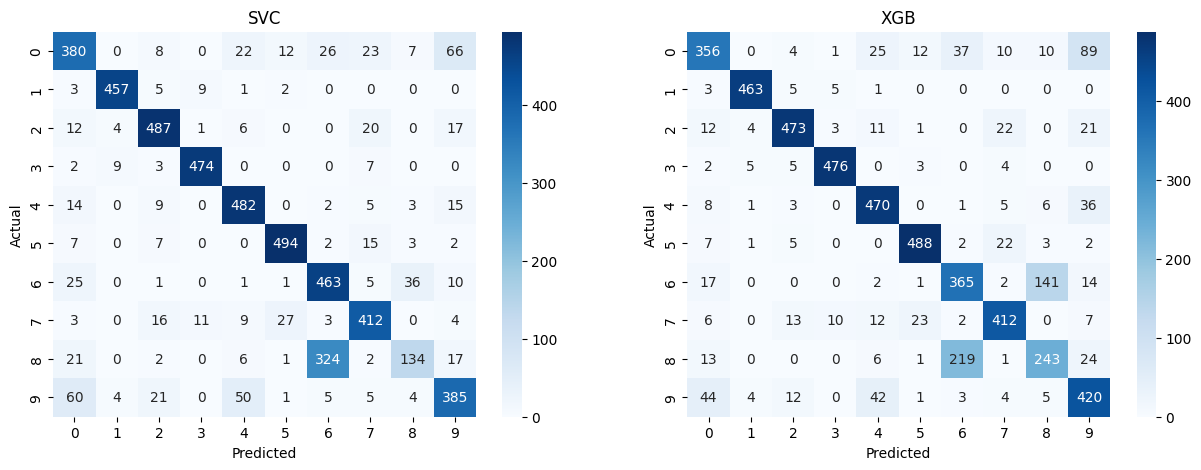

In [24]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# first, display both accuracy scores
print(f"SVC accuracy: {accuracy_score(y_test, y_pred_SVC)}")
print(f"XGB accuracy: {accuracy_score(y_test, y_pred_XGB)}")
print("\n")

# second, display both classification reports
print("SVC classification report:")
print(classification_report(y_test, y_pred_SVC))
print("XGB classification report:")
print(classification_report(y_test, y_pred_XGB))

# side by side comparison of the two models
cm = confusion_matrix(y_test, y_pred_SVC)
cm2 = confusion_matrix(y_test, y_pred_XGB)

# confusion matrix of the two models
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('SVC')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')

sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues', ax=ax[1])
ax[1].set_title('XGB')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')

plt.show()

Based on the metrics provided, the SVM (SVC) classifier performed slightly better than the XGB classifier on this dataset. The overall accuracy of the SVM classifier is 0.8037, while the accuracy of the XGB classifier is 0.7991, indicating that the SVM classifier correctly classified a higher percentage of instances.


<a id="1.4"></a>
### <b>A4. <span style='color:#E1B12D'>Independent evaluation</span></b>

<a id="1.4.1"></a>
#### <b><span style='color:#87CEEB'>Predicting music genre in another dataset<span></b>

We will perform the same data preprocessing steps to prepare our other dataset to be fed into our SVC model for music genre prediction.

In [25]:
# get another dataset
df2_ori = pd.read_csv("FIT1043-MusicGenre-Submission.csv")
df2 = df2_ori.copy()

In [26]:
# dropping same features as training data
df2.drop(['liveness', 'energy', 'instance_id', 'track_name'], axis=1, inplace=True)
df2

,artist_name,popularity,acousticness,danceability,duration_ms,instrumentalness,loudness,speechiness,tempo,valence
0,The Wood Brothers,27,0.06240,0.436,218227,0.001510,-5.897,0.0510,117.956,0.360
1,Pusha T,62,0.03470,0.582,195733,0.000000,-3.776,0.1780,82.193,0.205
2,EXILE,35,0.69200,0.269,324480,0.000000,-9.253,0.0338,139.338,0.250
3,empty_field,47,0.68200,0.428,256267,0.000005,-9.952,0.4940,173.272,0.573
4,Rammstein,48,0.00409,0.404,271173,0.000252,-5.565,0.0289,136.045,0.195
...,...,...,...,...,...,...,...,...,...,...
6485,Future,64,0.03010,0.903,207867,0.000016,-7.555,0.2370,149.991,0.268
6486,Future,53,0.42300,0.816,230129,0.000000,-7.953,0.1190,150.008,0.197
6487,Joe Nichols,55,0.14200,0.668,231347,0.000325,-4.351,0.0228,103.954,0.577
6488,X Ambassadors,49,0.02480,0.574,182320,0.000031,-6.038,0.0572,145.069,0.250


In [27]:
# selecting categorical and numerical features
X2_cat = df2.select_dtypes(include=['object'])
X2_num = df2.select_dtypes(include=['int64', 'float64'])

In [28]:
# replacing empty_field with random string
X2_cat.loc[X2_cat['artist_name'] == 'empty_field', 'artist_name'] = X2_cat.loc[X2_cat['artist_name'] == 'empty_field', 'artist_name'].apply(lambda x: generate_random_string())

In [29]:
# vectorization of artist name
X2_cat = embed_columns(X2_cat, ['artist_name'], vector_size=50)

# target encoding of artist name
X2_encoded_artist = enc.transform(X2_cat[['artist_name']])
X2_encoded_artist = pd.DataFrame(X2_encoded_artist, columns=[f"encoded_artist_name_{i}" for i in range(X2_encoded_artist.shape[1])])

# concatenating the the encoded artist name and its vector representation
X2_cat = pd.concat([X2_cat, X2_encoded_artist], axis=1)

# dropping original artist name
X2_cat.drop(columns=['artist_name'], inplace=True)

X2_cat

,artist_name_vector_0,artist_name_vector_1,artist_name_vector_2,artist_name_vector_3,artist_name_vector_4,artist_name_vector_5,artist_name_vector_6,artist_name_vector_7,artist_name_vector_8,artist_name_vector_9,...,encoded_artist_name_0,encoded_artist_name_1,encoded_artist_name_2,encoded_artist_name_3,encoded_artist_name_4,encoded_artist_name_5,encoded_artist_name_6,encoded_artist_name_7,encoded_artist_name_8,encoded_artist_name_9
0,-0.011312,0.009773,0.011736,0.015763,-0.004638,-0.005856,0.008629,0.002929,-0.009745,0.003030,...,0.000000,0.000000,0.772878,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.148326
1,-0.002453,-0.009639,0.003663,0.009105,0.008437,0.014183,-0.011523,0.013494,0.000623,0.002828,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.495985,0.00000,0.305487,0.000000
2,-0.011393,-0.003074,-0.011199,0.007592,-0.015027,-0.001180,0.013844,-0.004105,0.012863,0.004845,...,0.000000,1.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000
3,0.017824,-0.005387,0.017993,-0.015093,0.011798,0.000602,-0.000618,0.018469,0.009384,0.006720,...,0.099778,0.101031,0.102090,0.10262,0.099008,0.09843,0.099923,0.10079,0.097226,0.099104
4,-0.004258,-0.012877,-0.005803,-0.019647,-0.013038,-0.005456,0.014994,0.019205,0.001172,-0.008008,...,1.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6485,0.012251,0.017459,0.005094,0.002540,0.010075,0.015857,0.017434,0.017270,0.014044,0.015686,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.613678,0.00000,0.346893,0.000000
6486,0.012251,0.017459,0.005094,0.002540,0.010075,0.015857,0.017434,0.017270,0.014044,0.015686,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.613678,0.00000,0.346893,0.000000
6487,0.001721,-0.013172,-0.000652,-0.007343,0.010900,0.000540,0.002312,0.009334,0.000395,0.007824,...,0.000000,0.000000,0.000000,0.00000,0.525756,0.00000,0.000000,0.00000,0.000000,0.198051
6488,0.012173,-0.001185,0.004619,-0.015383,0.011468,-0.011376,0.011517,0.000855,0.004742,-0.005159,...,0.683025,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.152756


In [30]:
# scaling numerical features
X2_num_transformed = scaler.transform(X2_num)
X2_num_transformed = pd.DataFrame(X2_num_transformed, columns=[f"transform_{i}" for i in range(X2_num_transformed.shape[1])])
X2_num_transformed

,transform_0,transform_1,transform_2,transform_3,transform_4,transform_5,transform_6,transform_7,transform_8
0,0.128629,0.377498,0.246246,0.433283,0.575175,0.0,0.523524,0.483725,0.383383
1,0.882382,0.307808,0.536036,0.283998,0.000000,0.0,0.848458,0.116309,0.188188
2,0.284284,0.798444,0.071071,0.873525,0.000000,0.0,0.195696,0.724108,0.239239
3,0.553554,0.794746,0.234234,0.665881,0.360126,0.0,0.991507,0.947678,0.664665
4,0.575075,0.138233,0.200200,0.731469,0.512513,0.0,0.068068,0.696713,0.176176
...,...,...,...,...,...,...,...,...,...
6485,0.911411,0.293051,0.988039,0.363634,0.406176,0.0,0.891391,0.826556,0.257937
6486,0.690691,0.686687,0.935936,0.514123,0.000000,0.0,0.786787,0.827996,0.179179
6487,0.742743,0.489990,0.716717,0.523125,0.521972,0.0,0.000400,0.347516,0.668168
6488,0.597097,0.275776,0.518018,0.206523,0.432012,0.0,0.584585,0.789810,0.239239


In [31]:
# concatenating categorical and numerical features back as 1 dataframe
X2 = pd.concat([X2_cat, X2_num_transformed], axis=1)
X2 = X2.reset_index(drop=True)
X2

,artist_name_vector_0,artist_name_vector_1,artist_name_vector_2,artist_name_vector_3,artist_name_vector_4,artist_name_vector_5,artist_name_vector_6,artist_name_vector_7,artist_name_vector_8,artist_name_vector_9,...,encoded_artist_name_9,transform_0,transform_1,transform_2,transform_3,transform_4,transform_5,transform_6,transform_7,transform_8
0,-0.011312,0.009773,0.011736,0.015763,-0.004638,-0.005856,0.008629,0.002929,-0.009745,0.003030,...,0.148326,0.128629,0.377498,0.246246,0.433283,0.575175,0.0,0.523524,0.483725,0.383383
1,-0.002453,-0.009639,0.003663,0.009105,0.008437,0.014183,-0.011523,0.013494,0.000623,0.002828,...,0.000000,0.882382,0.307808,0.536036,0.283998,0.000000,0.0,0.848458,0.116309,0.188188
2,-0.011393,-0.003074,-0.011199,0.007592,-0.015027,-0.001180,0.013844,-0.004105,0.012863,0.004845,...,0.000000,0.284284,0.798444,0.071071,0.873525,0.000000,0.0,0.195696,0.724108,0.239239
3,0.017824,-0.005387,0.017993,-0.015093,0.011798,0.000602,-0.000618,0.018469,0.009384,0.006720,...,0.099104,0.553554,0.794746,0.234234,0.665881,0.360126,0.0,0.991507,0.947678,0.664665
4,-0.004258,-0.012877,-0.005803,-0.019647,-0.013038,-0.005456,0.014994,0.019205,0.001172,-0.008008,...,0.000000,0.575075,0.138233,0.200200,0.731469,0.512513,0.0,0.068068,0.696713,0.176176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6485,0.012251,0.017459,0.005094,0.002540,0.010075,0.015857,0.017434,0.017270,0.014044,0.015686,...,0.000000,0.911411,0.293051,0.988039,0.363634,0.406176,0.0,0.891391,0.826556,0.257937
6486,0.012251,0.017459,0.005094,0.002540,0.010075,0.015857,0.017434,0.017270,0.014044,0.015686,...,0.000000,0.690691,0.686687,0.935936,0.514123,0.000000,0.0,0.786787,0.827996,0.179179
6487,0.001721,-0.013172,-0.000652,-0.007343,0.010900,0.000540,0.002312,0.009334,0.000395,0.007824,...,0.198051,0.742743,0.489990,0.716717,0.523125,0.521972,0.0,0.000400,0.347516,0.668168
6488,0.012173,-0.001185,0.004619,-0.015383,0.011468,-0.011376,0.011517,0.000855,0.004742,-0.005159,...,0.152756,0.597097,0.275776,0.518018,0.206523,0.432012,0.0,0.584585,0.789810,0.239239


In [32]:
# predict the music genre with the better model
y2_pred = SVC.predict(X2)

# save the prediction with instance id and music genre in a df
df_pred = pd.DataFrame({'instance_id': df2_ori['instance_id'], 'music_genre': y2_pred})

In [33]:
# check the formatting
df_pred

,instance_id,music_genre
0,49290,2
1,81619,6
2,31979,1
3,35985,7
4,25426,0
...,...,...
6485,23196,6
6486,21415,6
6487,46657,4
6488,83211,0


In [34]:
# save as csv
df_pred.to_csv("34393862-LeeHaoYang-v9.csv", index=False)